In [23]:
import math
import pypot.dynamixel
from pypot.dynamixel.conversion import dxl_code
from pypot.dynamixel.conversion import dxl_decode
from time import sleep, time

from lib import Motor
import control_tables
from utils import read_from_file, dxl_decode_value

import matplotlib
import matplotlib.pyplot as plt
from utils import write_in_file
import numpy as np

This benchmark is about finding out whether speed should be calculated (by sampling position across time) or whether the speed values given from the motor are reliable.

We first sample some speed values (calculated and measured) without any load on the motor:

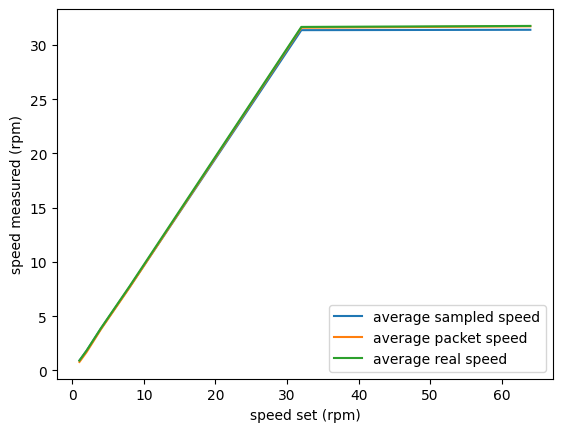

In [24]:
avg_sampled_speed = read_from_file("vel_avg_sampled_speed.txt")
avg_packet_speed = read_from_file("vel_avg_packet_speed.txt")
avg_reel_speed = read_from_file("vel_avg_reel_speed.txt")

speed_to_test = [2**n for n in range(7)]


plt.figure()

plt.plot(speed_to_test, avg_sampled_speed, label = "average sampled speed")
plt.plot(speed_to_test, avg_packet_speed, label = "average packet speed")
plt.plot(speed_to_test, avg_reel_speed, label = "average real speed")

plt.legend()

plt.xlabel("speed set (rpm)")
plt.ylabel("speed measured (rpm)")

plt.show()

In [25]:
n = len(avg_packet_speed)

avg_packet_speed = np.array(avg_packet_speed)
avg_reel_speed = np.array(avg_reel_speed)
avg_sampled_speed = np.array(avg_sampled_speed)
packet_sum_base =abs(avg_packet_speed - avg_reel_speed).sum()
packet_sum_square = ((avg_packet_speed - avg_reel_speed) *(avg_packet_speed - avg_reel_speed)).sum()


sampled_sum_base =abs(avg_sampled_speed - avg_reel_speed).sum()
sampled_sum_square = ((avg_sampled_speed - avg_reel_speed) *(avg_sampled_speed - avg_reel_speed)).sum()


print(f'Sampled speed MAE  : {sampled_sum_base/n:.4f}')
print(f'Sampled speed MSE  : {sampled_sum_square/n:.4f}')
print(f'Sampled speed RMSE : {np.sqrt(sampled_sum_square/n):.4f}')

print()

print(f'Packet  speed MAE  : {packet_sum_base/n:.4f}')
print(f'Packet  speed MSE  : {packet_sum_square/n:.4f}')
print(f'Packet  speed RMSE : {np.sqrt(packet_sum_square/n):.4f}')


Sampled speed MAE  : 0.1333
Sampled speed MSE  : 0.0349
Sampled speed RMSE : 0.1869

Packet  speed MAE  : 0.0975
Packet  speed MSE  : 0.0106
Packet  speed RMSE : 0.1031


We computed the MAE, MSE and RMSE between the speed values and the target speed values that were sent as commands to the motor.

In the case of unloaded motor, the packet speed values (speed values measured by the motor) are more reliable, their MAE and MSE being lower than those of the sampled (calculated) speeds.

We now proceed to load the motor and reconduct the experience.

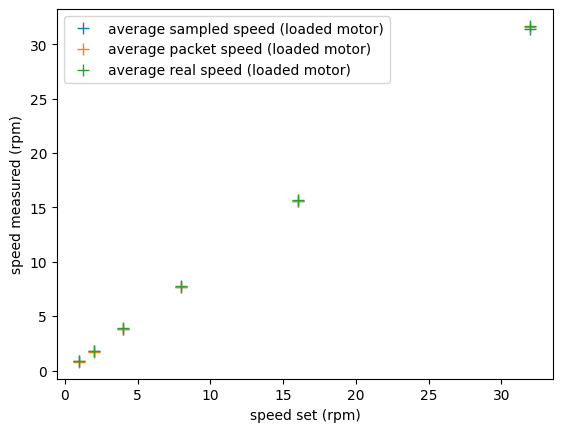

In [39]:
avg_sampled_speed = read_from_file("vel_loaded1_avg_sampled_speed.txt")
avg_packet_speed = read_from_file("vel_loaded1_avg_packet_speed.txt")
avg_reel_speed = read_from_file("vel_loaded1_avg_reel_speed.txt")

speed_to_test = [2**n for n in range(6)]


plt.figure()

plt.plot(speed_to_test, avg_sampled_speed, label = "average sampled speed (loaded motor)", marker="+", linestyle="None", markersize=8)
plt.plot(speed_to_test, avg_packet_speed, label = "average packet speed (loaded motor)", marker="+", linestyle="None", markersize=8)
plt.plot(speed_to_test, avg_reel_speed, label = "average real speed (loaded motor)", marker="+", linestyle="None", markersize=8)

plt.legend()

plt.xlabel("speed set (rpm)")
plt.ylabel("speed measured (rpm)")

plt.show()

In [27]:
n = len(avg_packet_speed)

avg_packet_speed = np.array(avg_packet_speed)
avg_reel_speed = np.array(avg_reel_speed)
avg_sampled_speed = np.array(avg_sampled_speed)
packet_sum_base =abs(avg_packet_speed - avg_reel_speed).sum()
packet_sum_square = ((avg_packet_speed - avg_reel_speed) *(avg_packet_speed - avg_reel_speed)).sum()


sampled_sum_base =abs(avg_sampled_speed - avg_reel_speed).sum()
sampled_sum_square = ((avg_sampled_speed - avg_reel_speed) *(avg_sampled_speed - avg_reel_speed)).sum()


print(f'Sampled speed MAE  : {sampled_sum_base/n:.4f}')
print(f'Sampled speed MSE  : {sampled_sum_square/n:.4f}')
print(f'Sampled speed RMSE : {np.sqrt(sampled_sum_square/n):.4f}')

print()

print(f'Packet  speed MAE  : {packet_sum_base/n:.4f}')
print(f'Packet  speed MSE  : {packet_sum_square/n:.4f}')
print(f'Packet  speed RMSE : {np.sqrt(packet_sum_square/n):.4f}')

Sampled speed MAE  : 0.0947
Sampled speed MSE  : 0.0188
Sampled speed RMSE : 0.1372

Packet  speed MAE  : 0.1032
Packet  speed MSE  : 0.0110
Packet  speed RMSE : 0.1046


Here, the packet speed still performs better with a lower MSE and lower RMSE.

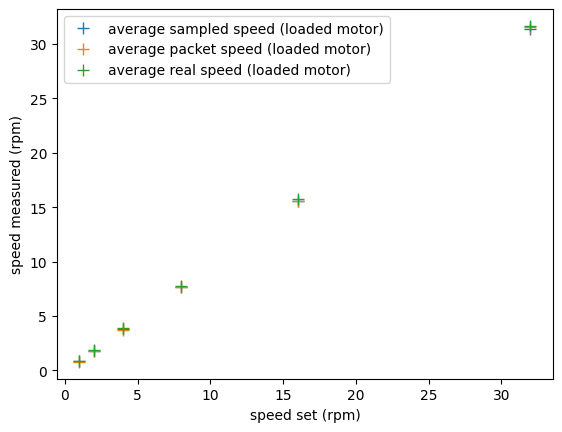

In [40]:
avg_sampled_speed = read_from_file("vel_loaded2_avg_sampled_speed.txt")
avg_packet_speed = read_from_file("vel_loaded2_avg_packet_speed.txt")
avg_reel_speed = read_from_file("vel_loaded2_avg_reel_speed.txt")

speed_to_test = [2**n for n in range(6)]

plt.figure()

plt.plot(speed_to_test, avg_sampled_speed, label = "average sampled speed (loaded motor)", marker="+", linestyle="None", markersize=8)
plt.plot(speed_to_test, avg_packet_speed, label = "average packet speed (loaded motor)", marker="+", linestyle="None", markersize=8)
plt.plot(speed_to_test, avg_reel_speed, label = "average real speed (loaded motor)", marker="+", linestyle="None", markersize=8)

plt.legend()

plt.xlabel("speed set (rpm)")
plt.ylabel("speed measured (rpm)")

plt.show()

In [41]:
n = len(avg_packet_speed)

avg_packet_speed = np.array(avg_packet_speed)
avg_reel_speed = np.array(avg_reel_speed)
avg_sampled_speed = np.array(avg_sampled_speed)
packet_sum_base = abs(avg_packet_speed - avg_reel_speed).sum()
packet_sum_square = ((avg_packet_speed - avg_reel_speed) *(avg_packet_speed - avg_reel_speed)).sum()

sampled_sum_base = abs(avg_sampled_speed - avg_reel_speed).sum()
sampled_sum_square = ((avg_sampled_speed - avg_reel_speed) *(avg_sampled_speed - avg_reel_speed)).sum()

print(f'Sampled speed MAE  : {sampled_sum_base/n:.4f}')
print(f'Sampled speed MSE  : {sampled_sum_square/n:.4f}')
print(f'Sampled speed RMSE : {np.sqrt(sampled_sum_square/n):.4f}')

print()

print(f'Packet  speed MAE  : {packet_sum_base/n:.4f}')
print(f'Packet  speed MSE  : {packet_sum_square/n:.4f}')
print(f'Packet  speed RMSE : {np.sqrt(packet_sum_square/n):.4f}')

Sampled speed MAE  : 0.0954
Sampled speed MSE  : 0.0191
Sampled speed RMSE : 0.1381

Packet  speed MAE  : 0.1026
Packet  speed MSE  : 0.0107
Packet  speed RMSE : 0.1035


In conclusion, the speed measured by the motor having lower error values or error values close to the ones of the computed speed, we decided to use this one as it is more straightforward in use.